# Author Identification
#### Carl Moser, Matthew Beaudouin-Lafon

We did stuff to do things with doodas.

In [89]:
from thinkbayes2 import Suite
from pickle import load
import thinkplot

def getPickle(fileName):
    infile = open(fileName, 'rb+')
    chain = load(infile)
    wordCount = load(infile)
    author = load(infile)
    infile.close()
    return (chain, wordCount, author)

def isWorthChecking(prevWord, word):
    worth = True
    for author, prob in authorId.Items():
        chain = authorId.markovChains[author][0]
        worth = worth and (bool(chain.get(prevWord)) and bool(chain[prevWord].get(word)))# and (chain[prevWord][word]/float(wordCount[prevWord]) > 1e-4)
    
    if not worth :# and word == 'unpack':
        print(chain[prevWord].get(word))
        
    return worth

class AuthorId(Suite):
    """
    
    """
                
    def Likelihood(self, data, hypo):
        """
        data: (string, string)
        hypo: (Markov Chain, Word Count dictionary, Author)
        """
        hypoAuthor = hypo
        chain, wordCount = self.markovChains[hypoAuthor]
        prevWord, word = data
        
        if (chain.get(prevWord) and chain[prevWord].get(word)):
            like = chain[prevWord][word]/float(wordCount[prevWord])
        else:      
            like = -1 # If isWorthChecking fails, this will throw an error
            
        print(hypoAuthor, '      ', like)
        return like

In [83]:
# files = ['Frankenstein', 'GreatExpecations', 'Hamlet', 'MobyDick', 'PierreAmbiguities', 'RomeoAndJuliet']
files = ['Frankenstein.dat', 'GreatExpectations.dat', 'RomeoAndJuliet.dat', 'MobyDick.dat', "The Hitch Hiker's Guide to the Galaxy.dat", 'Twilight.dat']

authorId = AuthorId()
authorId.markovChains = {}

for f in files:
    chain, wordCount, author = getPickle(f)
    authorId[author] = 1
    authorId.markovChains[author] = (chain, wordCount)

In [84]:
f = open('testText.dat', 'rb')
testText = load(f)
f.close()

In [91]:
for author, prob in authorId.Items():
    authorId[author] = 1
    
authorId.Normalize()
maryV = []
charlesV = []
shakeV = []
totalWords = 0
for sentence in testText:
    sentence = ['*'] + sentence
#     print(sentence)
    for i in range(len(sentence) - 1):
        totalWords += 1
            
        if isWorthChecking(sentence[i], sentence[i + 1]):
            authorId.Update((sentence[i], sentence[i + 1]))
            
        #Testing        
#         if totalWords == 233:
        print((sentence[i], sentence[i + 1]), isWorthChecking(sentence[i], sentence[i + 1]))
            
        maryV.append(authorId['Mary Shelley'])
        charlesV.append(authorId['Charles Dickens'])
        shakeV.append(authorId['Shakespeare'])
        
authorId

56
56
(('*', 'when'), False)
127
127
(('when', 'i'), False)
5
5
(('i', 'went'), False)
5
5
(('went', 'to'), False)
None
None
(('to', 'brush'), False)


KeyError: 'brush'

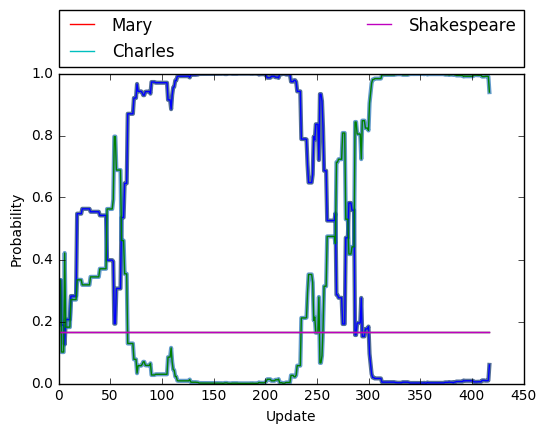

AttributeError: 'module' object has no attribute 'clear'

In [55]:
import matplotlib.pyplot as plt

#for i in (shakeV):
#    print(str(i) + ', ')
x = range(0, len(maryV))
plt.xlabel('Update')
plt.ylabel('Probability')
plt.plot(x, maryV, label='Mary')
plt.plot(x, charlesV, label='Charles')
plt.plot(x, shakeV, label='Shakespeare')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
plt.clear()
# for fuck, shit in zip(maryV, charlesV):
#     print(fuck, shit)
# authorId

In [76]:
chainC = authorId.markovChains['Charles Dickens'][0]
countC = authorId.markovChains['Charles Dickens'][1]

chainM = authorId.markovChains['Mary Shelley'][0]
countM = authorId.markovChains['Mary Shelley'][1]

chainS = authorId.markovChains['Shakespeare'][0]
countS = authorId.markovChains['Shakespeare'][1]

print(chainS)

{'schlegel': {'on': 1}, 'yellow': {'chapless': 1, 'melancholy': 1}, 'four': {'passages': 1, 'of': 1, 'lines': 1, 'forms': 1, 'she': 1, 'servingmen': 1, 'small': 1, 'tall': 1, 'or': 2, 'negatives': 1}, 'clotted': {'either': 1, 'blood': 1}, 'spiders': {'mentioned': 1, 'web': 1}, 'hanging': {'in': 1, 'up': 1, 'at': 1}, 'conjurd': {'it': 1}, 'conjure': {'thee': 1, 'accent': 1, 'only': 1, 'him': 1, 'too': 1}, 'increase': {'and': 1}, 'euery': {'company': 1, 'stocke': 1, 'one': 1, 'part': 1, 'houshold': 1, 'dish': 1, 'syde': 1}, 'portentous': {'must': 1}, 'benvolio': {'and': 5, 'says': 2, 'as': 1, 'in': 1, 'nephew': 1, 'enters': 1, 'presents': 1, 'to': 1, 'describes': 1, 'benvolio': 2, 'beat': 1, 'who': 1, 'but': 2, 'romeo': 1, 'with': 1, 'look': 1, 'like': 1, 'i': 1, 'die': 1, 'or': 1, 'the': 1, 'my': 1, 'page': 1}, 'rearguard': {'or': 1}, 'foul': {'sluttish': 1, 'thing': 1, 'as': 1, 'mouth': 1, 'collier': 1, 'murther': 1, 'vapours': 1}, 'stabbed': {'with': 1}, 'bringing': {'these': 1, 'most

Questions:
    - What to do with words that aren't there?
    - "To" appears a lot more than other words. Should it be weighed differently?
    - Integrate sentence lengths